Apabila proses produksi perusahaan tersebut menggunakan 6 aturan fuzzy sbb:
1. IF Permintaan TURUN And Persediaan BANYAK THEN Produksi Barang BERKURANG;
2. IF Permintaan TURUN And Persediaan SEDANG THEN Produksi Barang BERKURANG;
3. IF Permintaan TURUN And Persediaan SEDIKIT THEN Produksi Barang BERTAMBAH;
4. IF Permintaan NAIK And Persediaan BANYAK THEN Produksi Barang BERKURANG;
5. IF Permintaan NAIK And Persediaan SEDANG THEN Produksi Barang BERTAMBAH;
6. IF Permintaan NAIK And Persediaan SEDIKIT THEN Produksi Barang BETAMBAH;
    

Berapa kemasan makanan jenis ABC yang harus diproduksi, jika jumlah permintaan sebanyak **<1000 -3000 >** kemas
an, dan persediaan di gudang masih **<200 - 700>** kemasan?

JAWABAN : 

Saya mengambil nilai permintaan(x) = 2190 dan nilai persediaan(y) = 420

In [14]:
def decrease(x, min_value, max_value):
    result = (max_value - x) / (max_value - min_value)
    return max(0, min(result, 1)) 

def increase(x, min_value, max_value):
    result = (x - min_value) / (max_value - min_value)
    return max(0, min(result, 1))

def medium(x, a, b, c):
    if x <= a or x >= c:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    return 0

# ---------------- PERMINTAAN ----------------
x = 2190
min_value = 1000
max_value = 3000

permintaan_turun = decrease(x, min_value, max_value)
permintaan_naik = increase(x, min_value, max_value)

print("Permintaan:")
print(f"  Turun = {permintaan_turun:.3f}")
print(f"  Naik  = {permintaan_naik:.3f}")

# ---------------- PERSEDIAAN ----------------
x = 420
min_value = 200
mid_value = 450  # titik tengah untuk SEDANG
max_value = 700

persediaan_sedikit = decrease(x, min_value, max_value)
persediaan_banyak = increase(x, min_value, max_value)
persediaan_sedang = medium(x, min_value, mid_value, max_value)

print("\nPersediaan:")
print(f"  Sedikit = {persediaan_sedikit:.3f}")
print(f"  Sedang  = {persediaan_sedang:.3f}")
print(f"  Banyak  = {persediaan_banyak:.3f}")

# ---------------- RULE FUZZY ----------------
# 6 aturan
# ambil MIN antar premis
R1 = min(permintaan_turun, persediaan_banyak)   # BERKURANG
R2 = min(permintaan_turun, persediaan_sedang)   # BERKURANG
R3 = min(permintaan_turun, persediaan_sedikit)  # BERTAMBAH
R4 = min(permintaan_naik, persediaan_banyak)    # BERKURANG
R5 = min(permintaan_naik, persediaan_sedang)    # BERTAMBAH
R6 = min(permintaan_naik, persediaan_sedikit)   # BERTAMBAH

print("\nNilai Rules:")
print(f"R1 (permintaan_turun, persediaan_banyak, produksi_berkurang) = {R1:.3f}")
print(f"R2 (permintaan_turun, persediaan_sedang, produksi_berkurang) = {R2:.3f}")
print(f"R3 (permintaan_turun, persediaan_sedikit, produksi_bertambah) = {R3:.3f}")
print(f"R4 (permintaan_naik, persediaan_banyak, produksi_berkurang) = {R4:.3f}")
print(f"R5 (permintaan_naik, persediaan_sedang, produksi_bertambah) = {R5:.3f}")
print(f"R6 (permintaan_naik, persediaan_sedikit, produksi_bertambah) = {R6:.3f}")


Permintaan:
  Turun = 0.405
  Naik  = 0.595

Persediaan:
  Sedikit = 0.560
  Sedang  = 0.880
  Banyak  = 0.440

Nilai Rules:
R1 (permintaan_turun, persediaan_banyak, produksi_berkurang) = 0.405
R2 (permintaan_turun, persediaan_sedang, produksi_berkurang) = 0.405
R3 (permintaan_turun, persediaan_sedikit, produksi_bertambah) = 0.405
R4 (permintaan_naik, persediaan_banyak, produksi_berkurang) = 0.440
R5 (permintaan_naik, persediaan_sedang, produksi_bertambah) = 0.595
R6 (permintaan_naik, persediaan_sedikit, produksi_bertambah) = 0.560


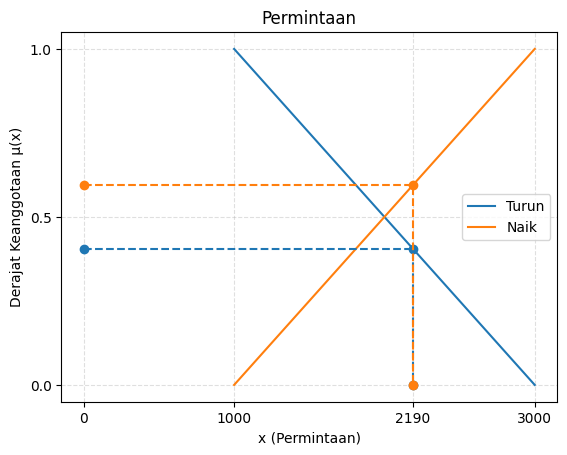

In [16]:
from matplotlib import pyplot as plt

class Permintaan():
    range = [1000, 3000]
    y_turun = [1, 0]
    y_naik = [0, 1] 

    def __init__(self):
        self.min_value = self.range[0]
        self.max_value = self.range[1]
        self.x = 2190

    @property
    def turun(self):
        if self.x <= self.min_value:
            return 1
        if self.x >= self.max_value:
            return 0
        return decrease(self.x, self.min_value, self.max_value)

    @property
    def naik(self):
        if self.x <= self.min_value:
            return 0
        if self.x >= self.max_value:
            return 1
        return increase(self.x, self.min_value, self.max_value)

    def get_graph(self):
        fig, ax = plt.subplots(1)

        # membership function
        x_vals = [self.min_value, self.max_value]
        y_turun = [1, 0]
        y_naik = [0, 1]

        ax.plot(x_vals, y_turun, label='Turun', color='C0')
        ax.plot(x_vals, y_naik, label='Naik', color='C1')

        # garis bantu titik fuzzy (seperti arahan dosen)
        if self.x is not None:
            x_fuzzy = [0, self.x, self.x]
            y_fuzzy_turun = [self.turun, self.turun, 0]
            y_fuzzy_naik = [self.naik, self.naik, 0]
            
            ax.plot(x_fuzzy, y_fuzzy_turun, 'o--', color='C0')
            ax.plot(x_fuzzy, y_fuzzy_naik, 'o--', color='C1')

        ax.set_title('Permintaan')
        ax.legend(loc='center right')
        ax.set_xlabel('x (Permintaan)')
        ax.set_ylabel('Derajat Keanggotaan μ(x)')

        x_ticks = [0, self.min_value, self.x, self.max_value]
        y_ticks = [0, 0.5, 1]
        plt.setp(ax, xticks=x_ticks, yticks=y_ticks)

        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()

pmt = Permintaan()

# pmt.x = 420
pmt.get_graph()


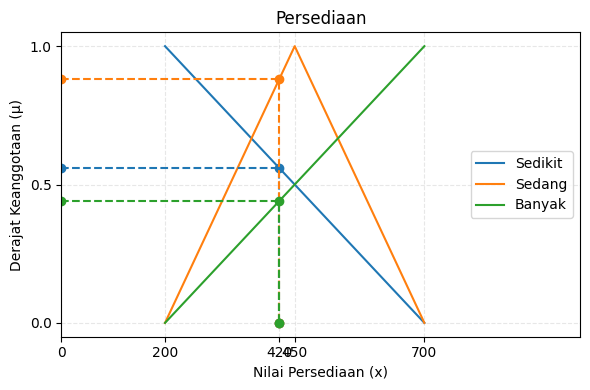

In [17]:
from matplotlib import pyplot as plt

def decrease(x, min_value, max_value):
    result = (max_value - x) / (max_value - min_value)
    return max(0, min(result, 1))

def increase(x, min_value, max_value):
    result = (x - min_value) / (max_value - min_value)
    return max(0, min(result, 1))

def medium(x, min_value, mid_value, max_value):
    if x <= min_value or x >= max_value:
        return 0
    elif min_value < x < mid_value:
        return (x - min_value) / (mid_value - min_value)
    elif mid_value <= x < max_value:
        return (max_value - x) / (max_value - mid_value)
    return 0


class Persediaan():
    range = [200, 700]
    mid_value = 450

    def __init__(self):
        self.min_value = self.range[0]
        self.max_value = self.range[1]
        self.mid = self.mid_value
        self.x = 420  # nilai persediaan

    @property
    def sedikit(self):
        return decrease(self.x, self.min_value, self.max_value)

    @property
    def sedang(self):
        return medium(self.x, self.min_value, self.mid, self.max_value)

    @property
    def banyak(self):
        return increase(self.x, self.min_value, self.max_value)

    def get_graph(self):
        fig, ax = plt.subplots(figsize=(6,4))

        # --- fungsi keanggotaan ---
        x_sedikit = [self.min_value, self.max_value]
        y_sedikit = [1, 0]

        x_sedang = [self.min_value, self.mid, self.max_value]
        y_sedang = [0, 1, 0]

        x_banyak = [self.min_value, self.max_value]
        y_banyak = [0, 1]

        ax.plot(x_sedikit, y_sedikit, label='Sedikit', color='C0')
        ax.plot(x_sedang, y_sedang, label='Sedang', color='C1')
        ax.plot(x_banyak, y_banyak, label='Banyak', color='C2')

        # --- titik hasil (pakai o-- seperti di Permintaan) ---
        x_fuzzy = [0, self.x, self.x]
        y_sedikit_f = [self.sedikit, self.sedikit, 0]
        y_sedang_f = [self.sedang, self.sedang, 0]
        y_banyak_f = [self.banyak, self.banyak, 0]

        ax.plot(x_fuzzy, y_sedikit_f, 'o--', color='C0')
        ax.plot(x_fuzzy, y_sedang_f, 'o--', color='C1')
        ax.plot(x_fuzzy, y_banyak_f, 'o--', color='C2')

        # --- tampilan grafik ---
        ax.set_title('Persediaan')
        ax.set_xlabel('Nilai Persediaan (x)')
        ax.set_ylabel('Derajat Keanggotaan (μ)')
        ax.legend(loc='center right')

        x_ticks = [0, self.min_value, self.mid, self.x, self.max_value]
        y_ticks = [0, 0.5, 1]
        plt.setp(ax, xticks=x_ticks, yticks=y_ticks)

        ax.set_xlim(0, 1000)
        ax.set_ylim(-0.05, 1.05)
        ax.grid(alpha=0.3, linestyle='--')

        plt.tight_layout()
        plt.show()


# --- Jalankan ---
psd = Persediaan()
psd.get_graph()

In [20]:
class Produksi:
    range = [2000, 7000]

    def __init__(self):
        self.min_value = self.range[0]
        self.max_value = self.range[1]
        self.permintaan = Permintaan()
        self.persediaan = Persediaan()

    @property
    def pmt_naik(self):
        return self.permintaan.naik

    @property
    def pmt_turun(self):
        return self.permintaan.turun

    @property
    def psd_banyak(self):
        return self.persediaan.banyak

    @property
    def psd_sedang(self):
        return self.persediaan.sedang

    @property
    def psd_sedikit(self):
        return self.persediaan.sedikit

    def berkurang(self, fuzzy_value):
        return self.max_value - fuzzy_value * (self.max_value - self.min_value)

    def bertambah(self, fuzzy_value):
        return fuzzy_value * (self.max_value - self.min_value) + self.min_value

    def rule(self):
        # --- Hitung tiap rule ---
        prod_fuzzy1 = min(self.pmt_turun, self.psd_banyak)
        prod_value1 = self.berkurang(prod_fuzzy1)

        prod_fuzzy2 = min(self.pmt_turun, self.psd_sedang)
        prod_value2 = self.berkurang(prod_fuzzy2)

        prod_fuzzy3 = min(self.pmt_turun, self.psd_sedikit)
        prod_value3 = self.bertambah(prod_fuzzy3)

        prod_fuzzy4 = min(self.pmt_naik, self.psd_banyak)
        prod_value4 = self.berkurang(prod_fuzzy4)

        prod_fuzzy5 = min(self.pmt_naik, self.psd_sedang)
        prod_value5 = self.bertambah(prod_fuzzy5)

        prod_fuzzy6 = min(self.pmt_naik, self.psd_sedikit)
        prod_value6 = self.bertambah(prod_fuzzy6)

        # --- Tampilkan hasil dalam format ringkas ---
        print(f"prod_fuzzy1={prod_fuzzy1:.2f}, prod_fuzzy2={prod_fuzzy2:.2f}, prod_fuzzy3={prod_fuzzy3:.2f}, prod_fuzzy4={prod_fuzzy4:.2f}, prod_fuzzy5={prod_fuzzy5:.2f}, prod_fuzzy6={prod_fuzzy6:.2f}")
        print(f"prod_value1={prod_value1:.1f}, prod_value2={prod_value2:.1f}, prod_value3={prod_value3:.1f}, prod_value4={prod_value4:.1f}, prod_value5={prod_value5:.1f}, prod_value6={prod_value6:.1f}")

        prod_fuzzy = [prod_fuzzy1, prod_fuzzy2, prod_fuzzy3, prod_fuzzy4, prod_fuzzy5, prod_fuzzy6]
        prod_value = [prod_value1, prod_value2, prod_value3, prod_value4, prod_value5, prod_value6]
        return prod_fuzzy, prod_value

    def defuzifikasi(self):
        prod_fuzzy, prod_value = self.rule()
        hasil = sum(prod_fuzzy[i] * prod_value[i] for i in range(len(prod_fuzzy))) / sum(prod_fuzzy)
        print(f"\nHasil defuzzifikasi: {hasil:.2f}")
        return hasil

In [21]:
# Jalankan
prod = Produksi()
prod.defuzifikasi()

prod_fuzzy1=0.41, prod_fuzzy2=0.41, prod_fuzzy3=0.41, prod_fuzzy4=0.44, prod_fuzzy5=0.59, prod_fuzzy6=0.56
prod_value1=4975.0, prod_value2=4975.0, prod_value3=4025.0, prod_value4=4800.0, prod_value5=4975.0, prod_value6=4800.0

Hasil defuzzifikasi: 4775.80


4775.800711743772

In [26]:
prod = Produksi()

print(f"{prod.pmt_turun=}\n {prod.pmt_naik=}\n {prod.psd_sedikit=}\n {prod.psd_sedang=}\n {prod.psd_banyak=}")

prod.pmt_turun=0.405
 prod.pmt_naik=0.595
 prod.psd_sedikit=0.56
 prod.psd_sedang=0.88
 prod.psd_banyak=0.44
